# Processamento de Imagens

# Atividade 1 - Point Processing e Histogramas

Nome Completo: João Pedro Silva Barbosa

Data: 04/03/2024

## **Exercícios**

#### 1. Para cada uma das transformações de point-processing vista em aula, defina **sua própria função que implementa a transformação (não utilize o OpenCV)**, escolha uma imagem da lista e aplique a trasformação com a função criada.
#### Mostre também para cada transformação um gráfico com a curva que relaciona os valores de entrada e saída.

Lista de transformações point-processing:
*   Inversão
*   Limiarização
*   Transformação log
*   Lei de Potência (gama > 1)
*   Lei de Potência (gama < 1)

In [ ]:
url_1 = "https://pe-images.s3.amazonaws.com/photo-editing/cc/tone-and-color/brightness-contrast/image-uselegacyoff-brightnessmin.jpg"
url_2 = "https://media.cheggcdn.com/media/df3/df3c284b-a776-404a-81e7-96f6487c383f/phpONQILA"
url_3 = "https://img.freepik.com/premium-vector/white-black-gradient-square-shape_118124-11165.jpg"
url_4 = "https://i.stack.imgur.com/TPVnd.png"
url_5 = "https://pbs.twimg.com/profile_images/128974112/smallPout_400x400.png"

1. **Resposta**

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import os
import urllib.request
from PIL import Image
import imageio.v2 as io

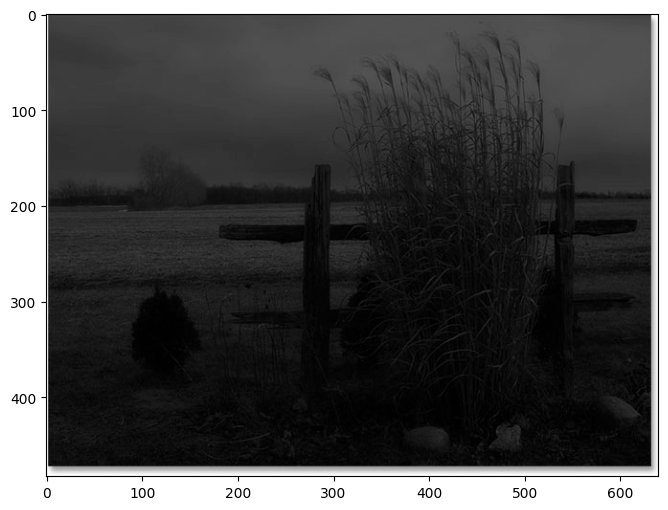

In [ ]:
img = io.imread(url_1);
R, G, B = img[:, :, 0], img[:, :, 1], img[:, :, 2]
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.figure(figsize = (18,6))
plt.imshow(imgGray, cmap='gray', vmin=0, vmax=255);


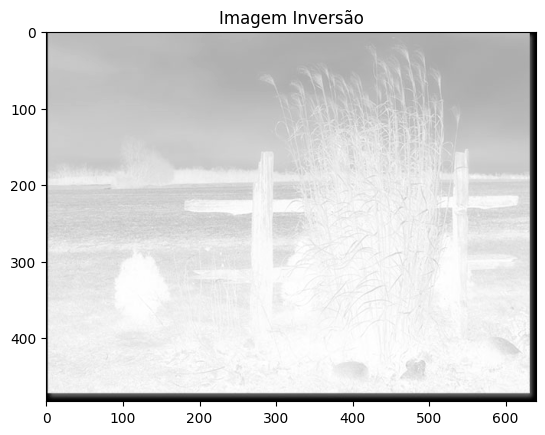

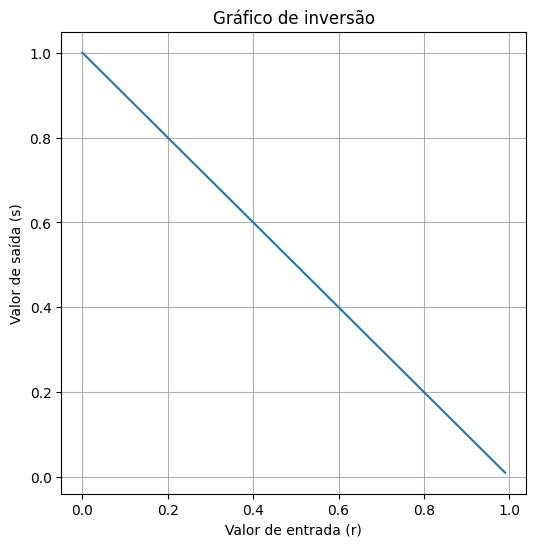

In [ ]:
def inversao():
  novaImg = imgGray.copy()
  for x in range(0, novaImg.shape[0]):
    for y in range(0, novaImg.shape[1]):
      novaImg[x, y] = 255 - novaImg[x, y]
  plt.imshow(novaImg, cmap='gray');
  plt.title('Imagem Inversão')
  plt.show()

inversao()

max = 1;
r = np.arange(0,max,0.01);
s = 1 - r

plt.figure(figsize = (6,6))
plt.plot(r,s);
plt.title('Gráfico de inversão')
plt.grid(True)
plt.xlabel("Valor de entrada (r)");
plt.ylabel("Valor de saída (s)");

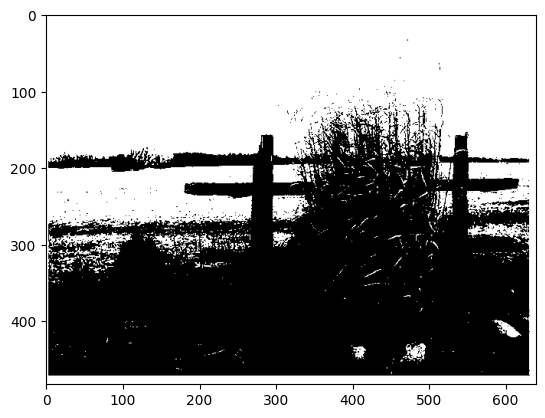

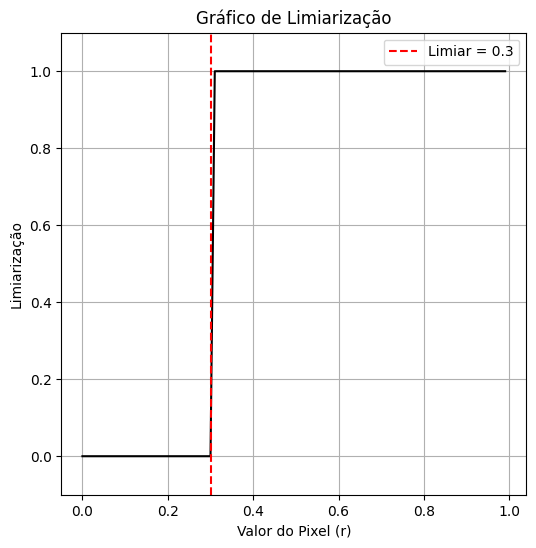

In [ ]:
def limiarizacao(limiar):
  novaImg2 = imgGray.copy()
  for x in range(0, novaImg2.shape[0]):
    for y in range(0, novaImg2.shape[1]):
      if (novaImg2[x, y] >= limiar):
        novaImg2[x, y] = 255
      else:
        novaImg2[x, y] = 0
  plt.imshow(novaImg2, cmap='gray');
  plt.show()
limiarizacao(30)

max_value = 1
limiar = 0.3
r = np.arange(0, max_value, 0.01)
limiarizacao = r > limiar
plt.figure(figsize = (6,6))
plt.plot(r, limiarizacao, color='black')
plt.axvline(x=limiar, color='red', linestyle='--', label=f'Limiar = {limiar}')
plt.title('Gráfico de Limiarização')
plt.xlabel('Valor do Pixel (r)')
plt.ylabel('Limiarização')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid(True)
plt.show()
##plt.plot(r,s);
###plt.grid(True)
#plt.xlabel("Valor de entrada (r)");
#plt.ylabel("Valor de saída (s)");

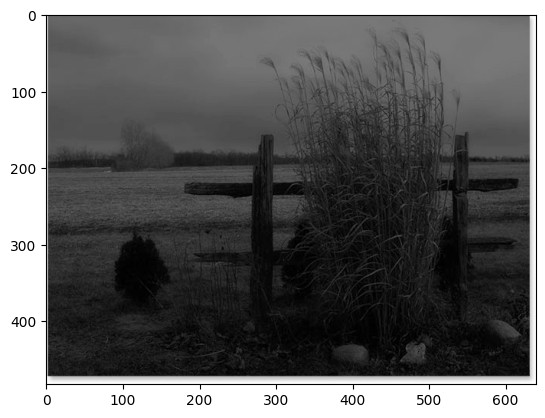

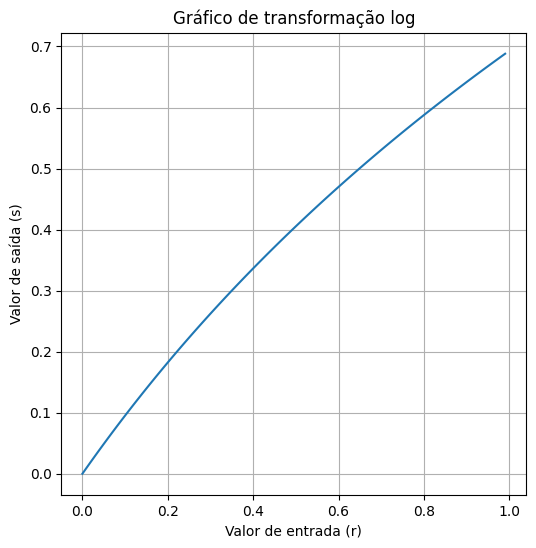

In [ ]:
def tranformacaoLog():
  novaImg3 = imgGray.copy()
  m = 255
  b = 0.01
  c = m / np.log(1 + (b*np.max(novaImg3)))
  log_img = c * (np.log((b*novaImg3) + 1))
  log_img = np.array(log_img, dtype = np.uint8)
  plt.imshow(log_img, cmap='gray');
  plt.show()
tranformacaoLog()



r = np.arange(0,max,0.01);
s = np.log(1+r)
plt.figure(figsize = (6,6))
plt.plot(r,s);
plt.title('Gráfico de transformação log')
plt.grid(True)
plt.xlabel("Valor de entrada (r)");
plt.ylabel("Valor de saída (s)");

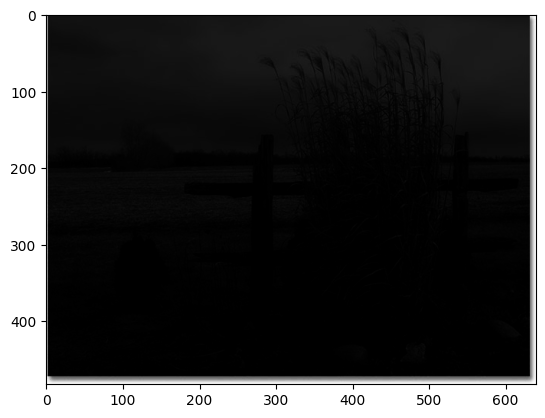

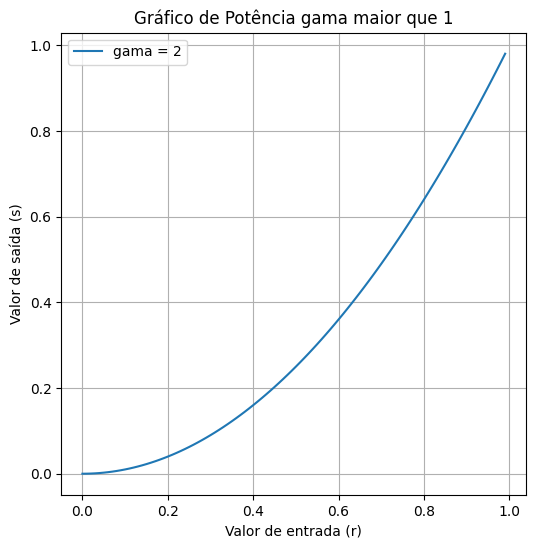

In [ ]:
def potenciaGamaMaior1():
  novaImg4 = imgGray.copy()
  for x in range(0, novaImg4.shape[0]):
    for y in range(0, novaImg4.shape[1]):
      max = 255;
      gama = 2;
      c = max/(max**gama);
      novaImg4[x, y] = c*novaImg4[x, y]**gama;
  plt.imshow(novaImg4, cmap='gray');
  plt.show()
potenciaGamaMaior1()

max = 1;
r = np.arange(0,max,0.01);
gama = 2;
c = max/(max**gama);
s = c*r**gama;

plt.figure(figsize = (6,6))
plt.plot(r,s);
plt.title('Gráfico de Potência gama maior que 1')
plt.grid(True)
plt.xlabel("Valor de entrada (r)");
plt.ylabel("Valor de saída (s)");
plt.legend(['gama = 2'])

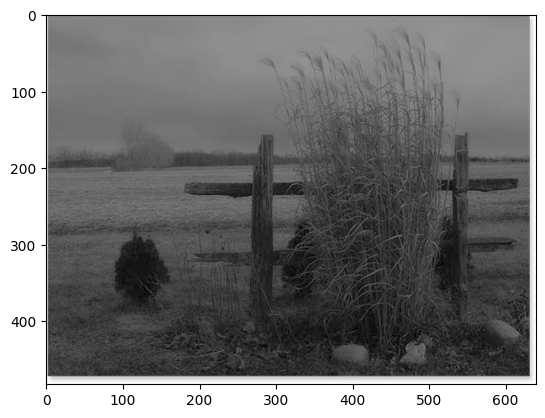

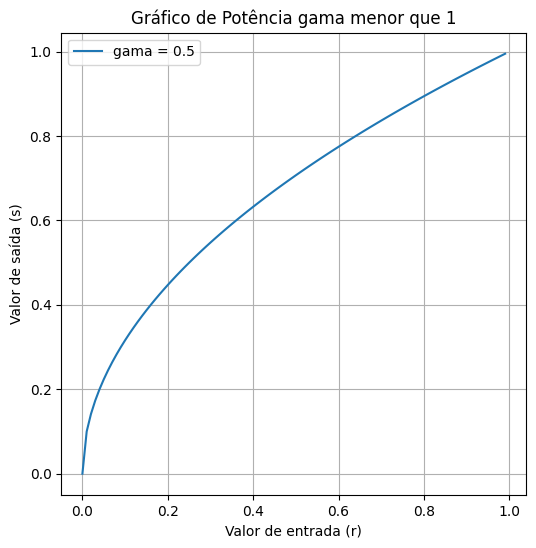

In [ ]:
def potenciaGamaMenor1():
  novaImg6 = imgGray.copy()
  for x in range(0, novaImg6.shape[0]):
    for y in range(0, novaImg6.shape[1]):
      max = 255;
      gama = 0.5;
      c = max/(max**gama);
      novaImg6[x, y] = c*novaImg6[x, y]**gama;
  plt.imshow(novaImg6, cmap='gray');
  plt.show()
potenciaGamaMenor1()

max = 1;
r = np.arange(0,max,0.01);
gama = 0.5;
c = max/(max**gama);
s = c*r**gama;

plt.figure(figsize = (6,6))
plt.plot(r,s);
plt.title('Gráfico de Potência gama menor que 1')
plt.grid(True)
plt.xlabel("Valor de entrada (r)");
plt.ylabel("Valor de saída (s)");
plt.legend(['gama = 0.5'])

#### 2.  Mostre uma comparação lado a lado das imagens e uma comparação dos histogramas (antes e depois) para cada uma das transformações implementadas.

Obs.: Utilize titulos para identificar as imagens antes/depois

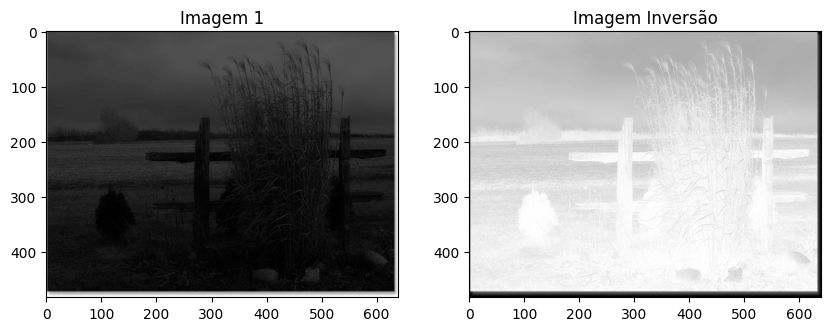

In [ ]:
# Cria uma figura e define dois subplots
plt.figure(figsize=(10, 5))

# Primeiro subplot para a primeira imagem
plt.subplot(1, 2, 1)
plt.imshow(imgGray, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem 1')
# Segundo subplot para a segunda imagem
plt.subplot(1, 2, 2)
inversao()


# Exibe a figura com os subplots
plt.show()

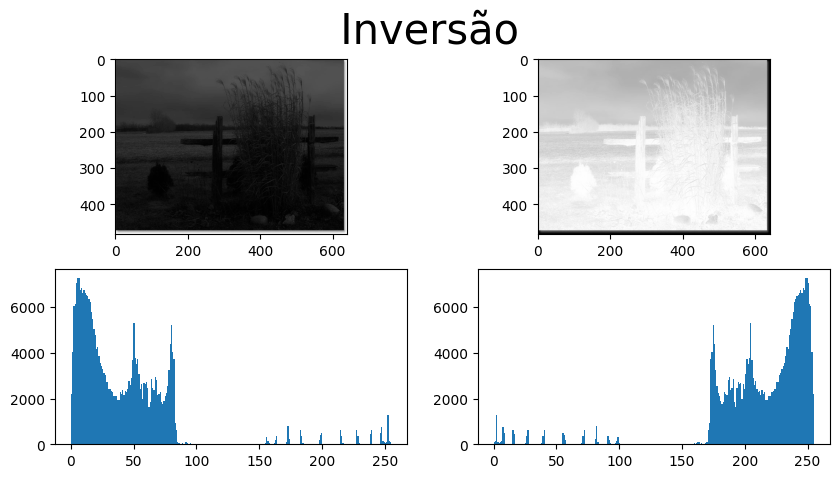

In [ ]:
novaImg = imgGray.copy()
for x in range(0, novaImg.shape[0]):
    for y in range(0, novaImg.shape[1]):
      novaImg[x, y] = 255 - novaImg[x, y]

f, ax = plt.subplots(2, 2, figsize=(10,5))
plt.suptitle(' Inversão ', fontsize=30)
ax[0,0].imshow(imgGray, cmap='gray');
ax[0,1].imshow(novaImg, cmap='gray');
ax[1,0].hist(imgGray.ravel(), bins=256, range=[0,255]);
ax[1,1].hist(novaImg.ravel(), bins=256, range=[0,255]);

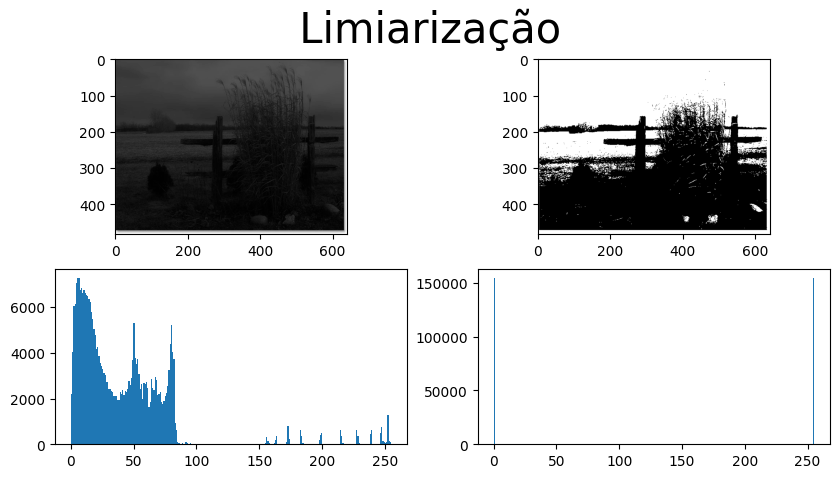

In [ ]:
novaImg2 = imgGray.copy()
for x in range(0, novaImg2.shape[0]):
  for y in range(0, novaImg2.shape[1]):
    if (novaImg2[x, y] >= 30):
        novaImg2[x, y] = 255
    else:
      novaImg2[x, y] = 0

f, ax = plt.subplots(2, 2, figsize=(10,5))
plt.suptitle(' Limiarização ', fontsize=30)
ax[0,0].imshow(imgGray, cmap='gray');
ax[0,1].imshow(novaImg2, cmap='gray');
ax[1,0].hist(imgGray.ravel(), bins=256, range=[0,255]);
ax[1,1].hist(novaImg2.ravel(), bins=256, range=[0,255]);

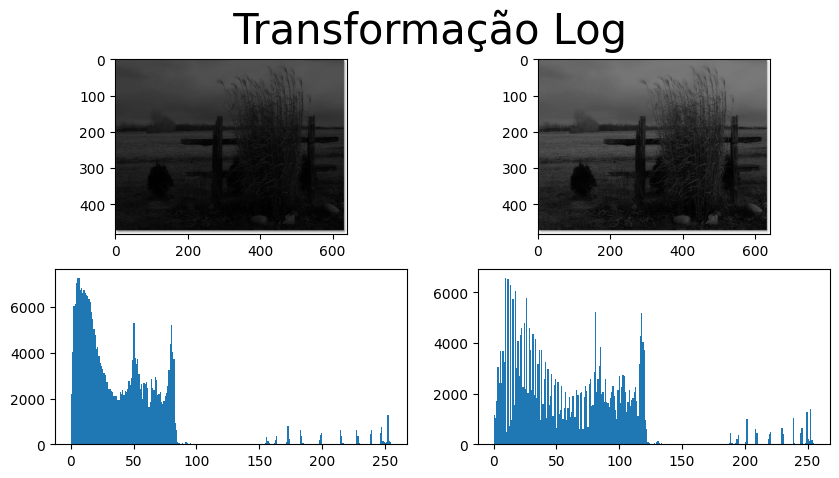

In [ ]:
novaImg3 = imgGray.copy()
m = 255
b = 0.01
c = m / np.log(1 + (b*np.max(novaImg3)))
log_img = c * (np.log((b*novaImg3) + 1))
log_img = np.array(log_img, dtype = np.uint8)

f, ax = plt.subplots(2, 2, figsize=(10,5))
plt.suptitle(' Transformação Log ', fontsize=30)
ax[0,0].imshow(imgGray, cmap='gray');
ax[0,1].imshow(log_img, cmap='gray');
ax[1,0].hist(imgGray.ravel(), bins=256, range=[0,255]);
ax[1,1].hist(log_img.ravel(), bins=256, range=[0,255]);

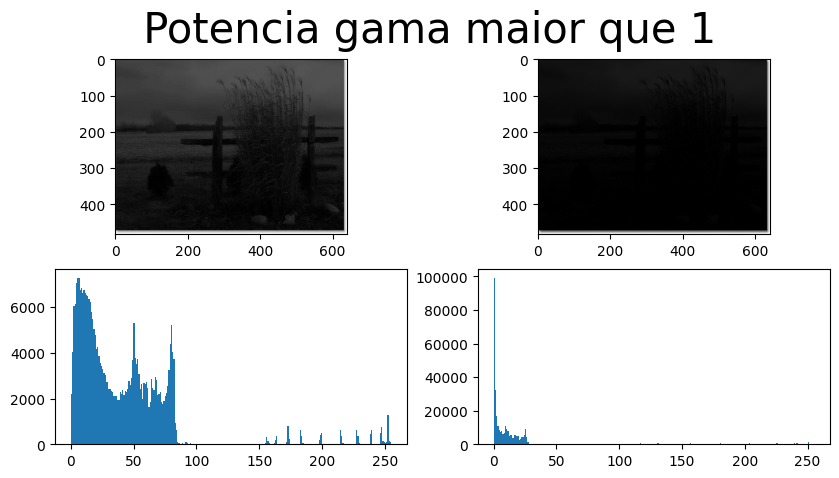

In [ ]:
novaImg4 = imgGray.copy()
for x in range(0, novaImg4.shape[0]):
  for y in range(0, novaImg4.shape[1]):
    max = 255;
    gama = 2;
    c = max/(max**gama);
    novaImg4[x, y] = c*novaImg4[x, y]**gama;

f, ax = plt.subplots(2, 2, figsize=(10,5))
plt.suptitle(' Potencia gama maior que 1 ', fontsize=30)
ax[0,0].imshow(imgGray, cmap='gray');
ax[0,1].imshow(novaImg4, cmap='gray');
ax[1,0].hist(imgGray.ravel(), bins=256, range=[0,255]);
ax[1,1].hist(novaImg4.ravel(), bins=256, range=[0,255]);



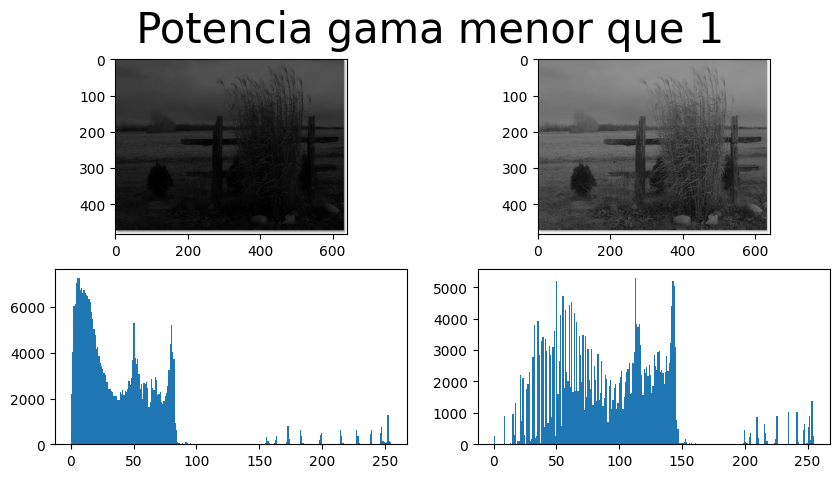

In [ ]:
novaImg6 = imgGray.copy()
for x in range(0, novaImg6.shape[0]):
  for y in range(0, novaImg6.shape[1]):
    max = 255;
    gama = 0.5;
    c = max/(max**gama);
    novaImg6[x, y] = c*novaImg6[x, y]**gama;

f, ax = plt.subplots(2, 2, figsize=(10,5))
plt.suptitle(' Potencia gama menor que 1 ', fontsize=30)
ax[0,0].imshow(imgGray, cmap='gray');
ax[0,1].imshow(novaImg6, cmap='gray');
ax[1,0].hist(imgGray.ravel(), bins=256, range=[0,255]);
ax[1,1].hist(novaImg6.ravel(), bins=256, range=[0,255]);

